## Package

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import export_text
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

## Read Dataset

In [ ]:
df = pd.read_csv(r"E:\MBKM\telcochurn.csv")
df

#PreProcessing

###Checking NaN values

In [108]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Convert TotalCharges and SeniorCitizen into numeric and object type

In [109]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')
df['SeniorCitizen']=df['SeniorCitizen'].astype(object)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


####Checking Nan Values in TotalCharges before conducting an Action

In [111]:
df[df.isnull().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


####Filling Cells in TotalCharges with NaN values with 0

In [112]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)

##### drop costumerid

In [113]:
df.drop(columns = ['customerID'], axis=1, inplace=True)

### Anomaly Checking

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


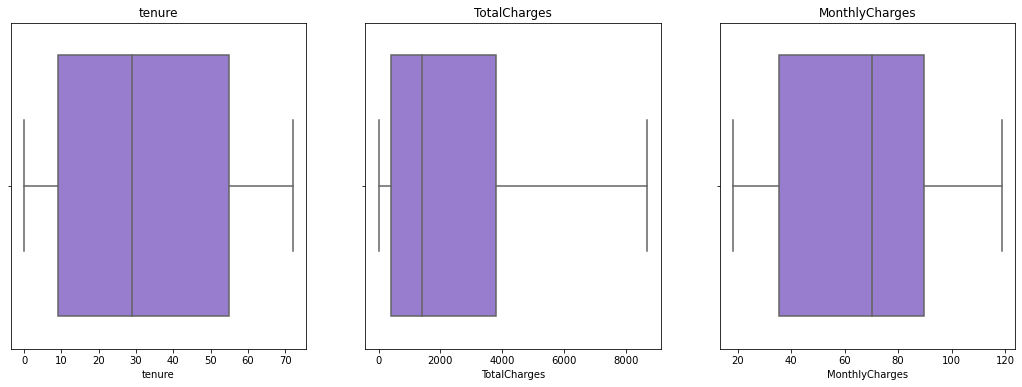

In [114]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.boxplot(df['tenure'], color = "mediumpurple")
plt.title("tenure")
plt.subplot(1,3,2)
sns.boxplot(df['TotalCharges'], color = "mediumpurple")
plt.title("TotalCharges")
plt.subplot(1,3,3)
sns.boxplot(df['MonthlyCharges'], color = "mediumpurple")
plt.title("MonthlyCharges")


plt.show()

#### No outlier detected

# EDA

###Statistical Information from the Data

In [115]:
df.describe

<bound method NDFrame.describe of       gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female             0     Yes         No       1           No   
1       Male             0      No         No      34          Yes   
2       Male             0      No         No       2          Yes   
3       Male             0      No         No      45           No   
4     Female             0      No         No       2          Yes   
...      ...           ...     ...        ...     ...          ...   
7038    Male             0     Yes        Yes      24          Yes   
7039  Female             0     Yes        Yes      72          Yes   
7040  Female             0     Yes        Yes      11           No   
7041    Male             1     Yes         No       4          Yes   
7042    Male             0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No  

### Correlation Analysis to Detect Multicolinierity

                  tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.247900      0.826178
MonthlyCharges  0.247900        1.000000      0.651174
TotalCharges    0.826178        0.651174      1.000000


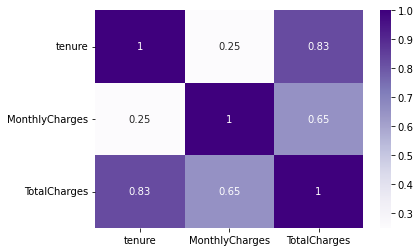

In [116]:
corr=df.corr()
print(corr)
corrplot=sns.heatmap(corr, cmap="Purples", annot=True)
plt.show()

### Distribution

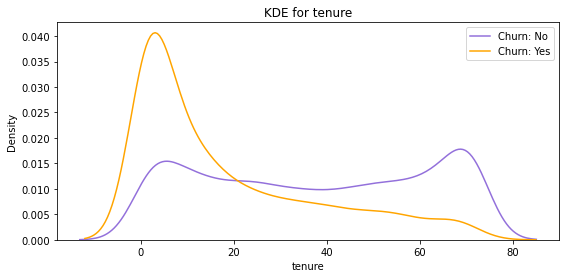

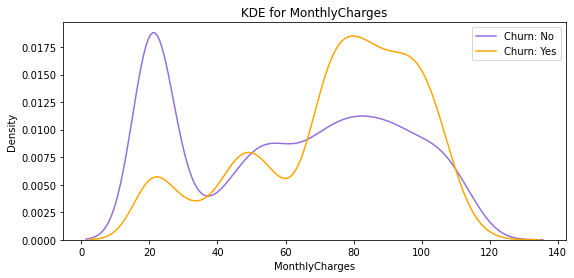

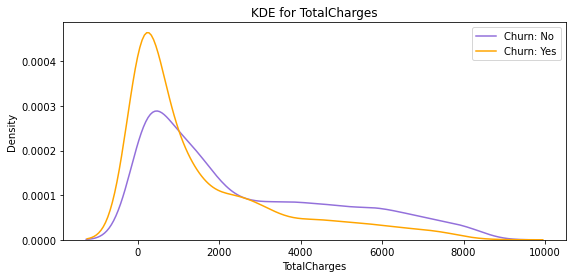

In [117]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df[df['Churn'] == 'No'][feature].dropna(), color='mediumpurple', label= 'Churn: No')
    ax1 = sns.kdeplot(df[df['Churn'] == 'Yes'][feature].dropna(), color='orange', label= 'Churn: Yes')
kdeplot('tenure')
plt.legend()
kdeplot('MonthlyCharges')
plt.legend()
kdeplot('TotalCharges')
plt.legend()
plt.show()

E:\Anaconda\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Total Charges vs Churn')

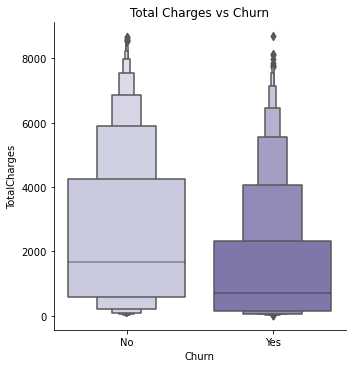

In [118]:
g = sns.factorplot(y="TotalCharges",x="Churn",data=df,kind="boxen", palette = "Purples")
plt.title("Total Charges vs Churn")

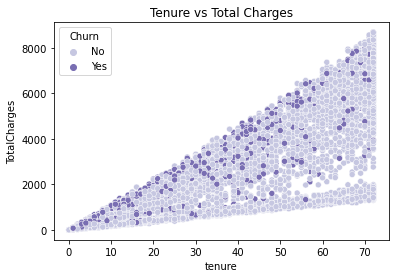

In [119]:
sns.scatterplot(data=df, x="tenure", y="TotalCharges", hue="Churn", palette="Purples")
plt.title("Tenure vs Total Charges")
plt.show()

### Crosstab

In [120]:
pd.crosstab(df['Churn'], df['PhoneService'], margins=True)

PhoneService,No,Yes,All
Churn,,,
No,512,4662,5174
Yes,170,1699,1869
All,682,6361,7043


In [121]:
pd.crosstab(df['Churn'], df['gender'], margins=True)

gender,Female,Male,All
Churn,,,
No,2549,2625,5174
Yes,939,930,1869
All,3488,3555,7043


In [122]:
pd.crosstab(df['Churn'], df['Partner'], margins=True)

Partner,No,Yes,All
Churn,,,
No,2441,2733,5174
Yes,1200,669,1869
All,3641,3402,7043


In [123]:
pd.crosstab(df['Churn'], df['Dependents'], margins=True)

Dependents,No,Yes,All
Churn,,,
No,3390,1784,5174
Yes,1543,326,1869
All,4933,2110,7043


In [124]:
pd.crosstab(df['Churn'], df['MultipleLines'], margins=True)

MultipleLines,No,No phone service,Yes,All
Churn,,,,
No,2541,512,2121,5174
Yes,849,170,850,1869
All,3390,682,2971,7043


In [125]:
pd.crosstab(df['Churn'], df['InternetService'], margins=True)

InternetService,DSL,Fiber optic,No,All
Churn,,,,
No,1962,1799,1413,5174
Yes,459,1297,113,1869
All,2421,3096,1526,7043


In [126]:
pd.crosstab(df['Churn'], df['OnlineBackup'], margins=True)

OnlineBackup,No,No internet service,Yes,All
Churn,,,,
No,1855,1413,1906,5174
Yes,1233,113,523,1869
All,3088,1526,2429,7043


In [127]:
pd.crosstab(df['Churn'], df['OnlineSecurity'], margins=True)

OnlineSecurity,No,No internet service,Yes,All
Churn,,,,
No,2037,1413,1724,5174
Yes,1461,113,295,1869
All,3498,1526,2019,7043


In [128]:
pd.crosstab(df['Churn'], df['DeviceProtection'], margins=True)

DeviceProtection,No,No internet service,Yes,All
Churn,,,,
No,1884,1413,1877,5174
Yes,1211,113,545,1869
All,3095,1526,2422,7043


In [129]:
pd.crosstab(df['Churn'], df['TechSupport'], margins=True)

TechSupport,No,No internet service,Yes,All
Churn,,,,
No,2027,1413,1734,5174
Yes,1446,113,310,1869
All,3473,1526,2044,7043


In [130]:
pd.crosstab(df['Churn'], df['StreamingTV'], margins=True)

StreamingTV,No,No internet service,Yes,All
Churn,,,,
No,1868,1413,1893,5174
Yes,942,113,814,1869
All,2810,1526,2707,7043


In [131]:
pd.crosstab(df['Churn'], df['Contract'], margins=True)

Contract,Month-to-month,One year,Two year,All
Churn,,,,
No,2220,1307,1647,5174
Yes,1655,166,48,1869
All,3875,1473,1695,7043


In [132]:
pd.crosstab(df['Churn'], df['PaperlessBilling'], margins=True)

PaperlessBilling,No,Yes,All
Churn,,,
No,2403,2771,5174
Yes,469,1400,1869
All,2872,4171,7043


In [133]:
pd.crosstab(df['Churn'], df['PaymentMethod'], margins=True)

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,All
Churn,,,,,
No,1286,1290,1294,1304,5174
Yes,258,232,1071,308,1869
All,1544,1522,2365,1612,7043


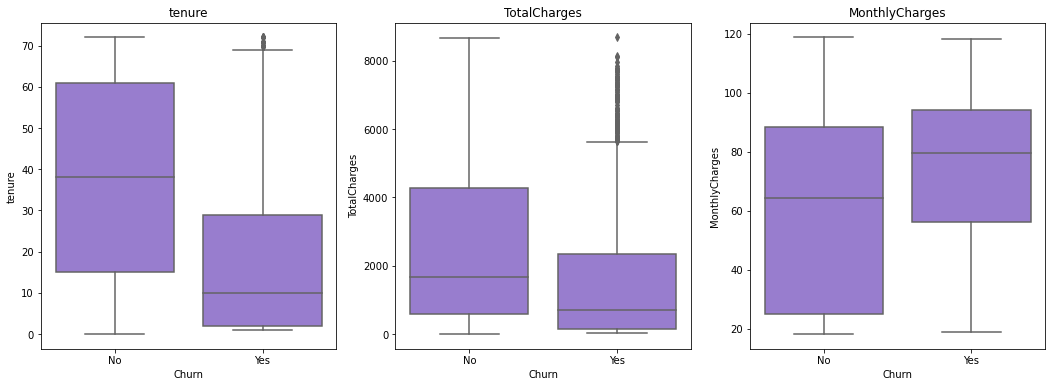

In [134]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.boxplot(data=df, x='Churn', y='tenure', color = "mediumpurple")
plt.title("tenure")
plt.subplot(1,3,2)
sns.boxplot(data=df, x='Churn', y='TotalCharges', color = "mediumpurple")
plt.title("TotalCharges")
plt.subplot(1,3,3)
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', color = "mediumpurple")
plt.title("MonthlyCharges")


plt.show()



```
# Ini diformat sebagai kode
```

### BarChart

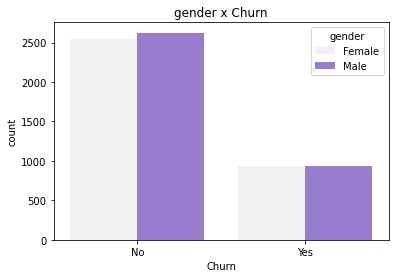

In [135]:
fig = plt.figure()  
ax = sns.countplot(data = df, x='Churn', hue = 'gender', color = 'mediumpurple')
plt.title("gender x Churn")
plt.show() 

In [136]:
df.drop(['gender'], axis=1, inplace=True)

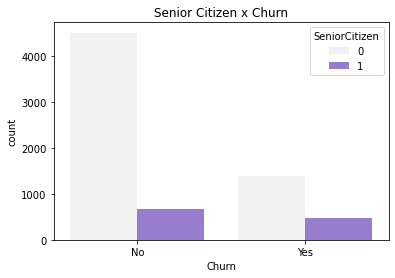

In [137]:
fig = plt.figure()  
ax = sns.countplot(data = df, x='Churn', hue = 'SeniorCitizen', color = 'mediumpurple')
plt.title('Senior Citizen x Churn')
plt.show() 

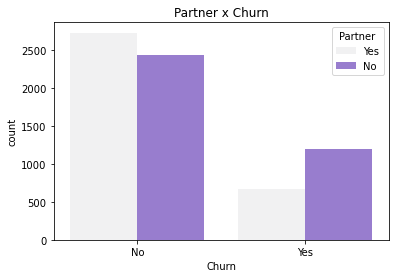

In [138]:
fig = plt.figure()  
ax = sns.countplot(data = df, x='Churn', hue = 'Partner',color = 'mediumpurple')
plt.title('Partner x Churn')
plt.show() 

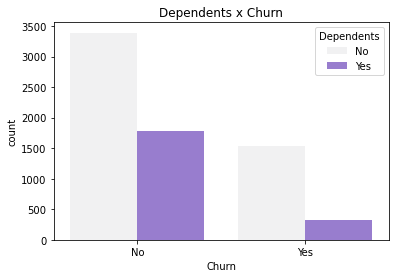

In [139]:
fig = plt.figure()  
ax = sns.countplot(data = df, x='Churn', hue = 'Dependents',color = 'mediumpurple')
plt.title('Dependents x Churn')
plt.show() 

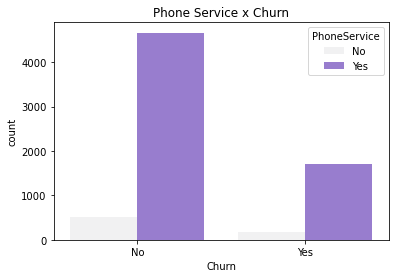

In [140]:
fig = plt.figure()  
ax = sns.countplot(data = df, x='Churn', hue = 'PhoneService', color = 'mediumpurple')
plt.title('Phone Service x Churn')
plt.show() 

In [141]:
df['OnlineSecurity'].replace('No internet service','No', inplace=True)
df['OnlineBackup'].replace('No internet service','No', inplace=True)
df['DeviceProtection'].replace('No internet service','No', inplace=True)
df['TechSupport'].replace('No internet service','No', inplace=True)
df['StreamingTV'].replace('No internet service','No', inplace=True)
df['StreamingMovies'].replace('No internet service','No', inplace=True)

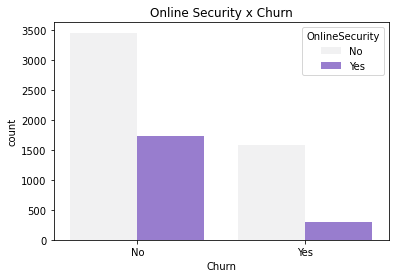

In [142]:
fig = plt.figure()  
ax = sns.countplot(data = df, x='Churn', hue = 'OnlineSecurity',color = 'mediumpurple')
plt.title('Online Security x Churn')
plt.show() 

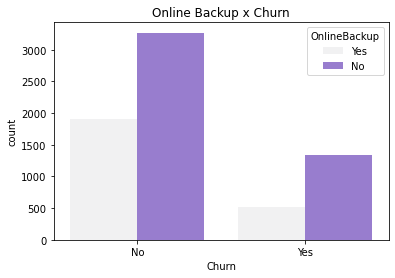

In [143]:
fig = plt.figure()  
ax = sns.countplot(data = df, x='Churn', hue = 'OnlineBackup',color = 'mediumpurple')
plt.title('Online Backup x Churn')
plt.show() 

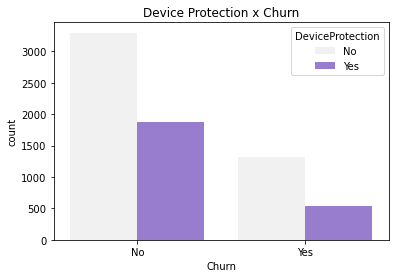

In [144]:
fig = plt.figure()  
ax = sns.countplot(data = df, x='Churn', hue = 'DeviceProtection',color = 'mediumpurple')
plt.title('Device Protection x Churn')
plt.show() 

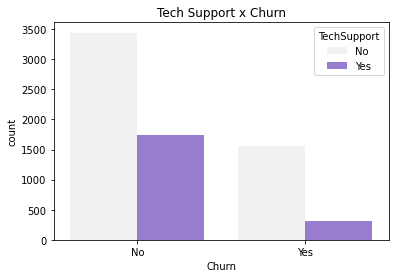

In [145]:
fig = plt.figure()  
ax = sns.countplot(data = df, x='Churn', hue = 'TechSupport',color = 'mediumpurple')
plt.title('Tech Support x Churn')
plt.show() 

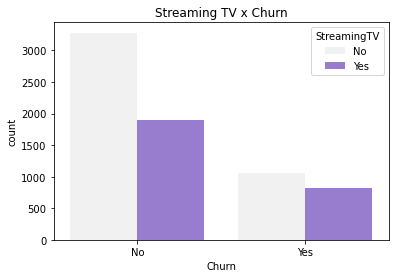

In [146]:
fig = plt.figure()  
ax = sns.countplot(data = df, x='Churn', hue = 'StreamingTV', color = 'mediumpurple')
plt.title('Streaming TV x Churn')
plt.show() 

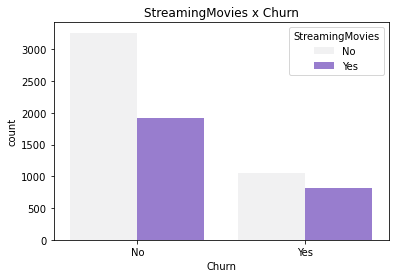

In [147]:
fig = plt.figure()  
ax = sns.countplot(data = df, x='Churn', hue = 'StreamingMovies',color = 'mediumpurple')
plt.title('StreamingMovies x Churn')
plt.show() 

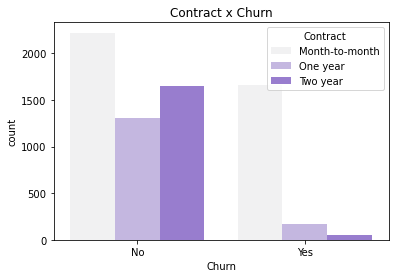

In [148]:
fig = plt.figure()  
ax = sns.countplot(data = df, x='Churn', hue = 'Contract',color = 'mediumpurple')
plt.title('Contract x Churn')
plt.show() 



```
`# Ini diformat sebagai kode`
```

#Modelling

### Yes No Feature Dummies

In [149]:
df['Churn'] = df['Churn'].map(lambda s :1  if s =='Yes' else 0)

In [150]:
df['MultipleLines'] = df['MultipleLines'].map(lambda s :1  if s =='Yes' else 0)

In [151]:
df['InternetService'] = df['InternetService'].map(lambda s :1  if s =='Yes' else 0)

In [152]:
df['OnlineSecurity'] = df['OnlineSecurity'].map(lambda s :1  if s =='Yes' else 0)

In [153]:
df['OnlineBackup'] = df['OnlineBackup'].map(lambda s :1  if s =='Yes' else 0)

In [154]:
df['DeviceProtection'] = df['DeviceProtection'].map(lambda s :1  if s =='Yes' else 0)

In [155]:
df['TechSupport'] = df['TechSupport'].map(lambda s :1  if s =='Yes' else 0)

In [156]:
df['StreamingTV'] = df['StreamingTV'].map(lambda s :1  if s =='Yes' else 0)

In [157]:
df['StreamingMovies'] = df['StreamingMovies'].map(lambda s :1  if s =='Yes' else 0)

In [158]:
df['SeniorCitizen'] = df['SeniorCitizen'].map(lambda s :1  if s =='Yes' else 0)

In [159]:
df['Dependents'] = df['Dependents'].map(lambda s :1  if s =='Yes' else 0)

In [160]:
df['PhoneService'] = df['PhoneService'].map(lambda s :1  if s =='Yes' else 0)

In [161]:
df['Partner'] = df['Partner'].map(lambda s :1  if s =='Yes' else 0)

In [162]:
df['PaperlessBilling'] = df['PaperlessBilling'].map(lambda s :1  if s =='Yes' else 0)

In [163]:
df["Churn"].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

##Oversampling Solving

In [164]:
from sklearn.utils import resample
 
df_majority = df[(df['Churn']==0)] 
df_minority = df[(df['Churn']==1)] 
df_minority_upsampled = resample(df_minority, 
                                 replace=True,   
                                 n_samples= 5174,
                                 random_state=42)
df = pd.concat([df_minority_upsampled, df_majority])

##Dummies Tranformation

In [165]:
df_dummies=pd.get_dummies(df)
df_dummies

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4290,0,1,1,1,0,0,0,0,0,0,...,40.10,40.10,1,1,0,0,0,0,1,0
5547,0,0,0,3,1,0,0,0,0,0,...,89.45,240.45,1,1,0,0,0,0,1,0
3302,0,0,0,31,1,1,0,0,1,1,...,103.45,3066.45,1,0,1,0,0,0,1,0
4949,0,0,0,5,0,0,0,0,1,0,...,51.00,305.95,1,1,0,0,0,0,0,1
4307,0,0,0,37,1,1,0,0,0,0,...,96.55,3580.30,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,0,0,72,1,0,0,0,0,0,...,21.15,1419.40,0,0,0,1,1,0,0,0
7038,0,1,1,24,1,1,0,1,0,1,...,84.80,1990.50,0,0,1,0,0,0,0,1
7039,0,1,1,72,1,1,0,0,1,1,...,103.20,7362.90,0,0,1,0,0,1,0,0
7040,0,1,1,11,0,0,0,1,0,0,...,29.60,346.45,0,1,0,0,0,0,1,0


##Train Test Split

In [166]:
X = df_dummies.loc[:, df_dummies.columns != 'Churn']
y = df_dummies["Churn"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1)

##Standardized Numeric Data

In [167]:
num_col = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()

X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

E:\Anaconda\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
E:\Anaconda\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


##Modelling

### Logistic Regression

In [168]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr=lr.fit(X_train, y_train)

### Decision Tree

In [169]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

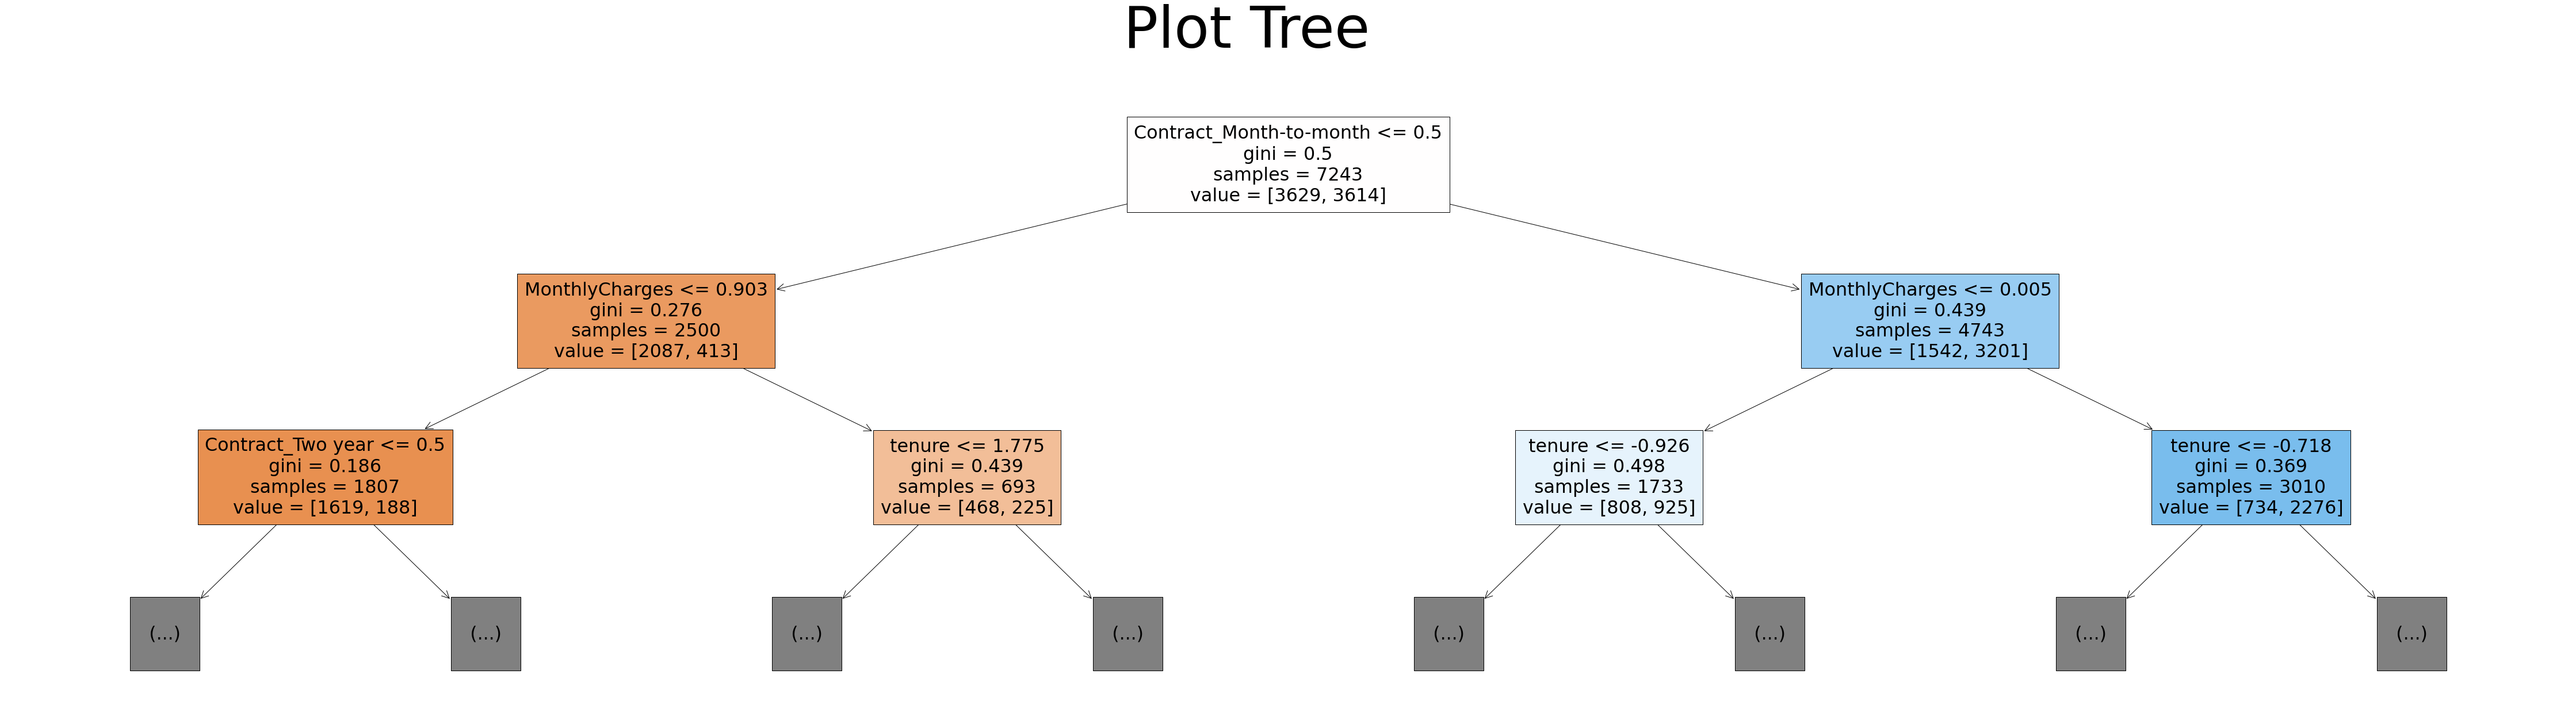

In [170]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize =(80,20))
plt.suptitle("Plot Tree", fontsize = 100)
plot_tree(dtree, feature_names=X_train.columns, max_depth=2, filled=True);
plt.show()

In [171]:
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
train_scores, test_scores= list(), list()
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.730, test: 0.726
>2, train: 0.730, test: 0.726
>3, train: 0.756, test: 0.748
>4, train: 0.758, test: 0.751
>5, train: 0.775, test: 0.746
>6, train: 0.790, test: 0.767
>7, train: 0.814, test: 0.773
>8, train: 0.840, test: 0.791
>9, train: 0.860, test: 0.804
>10, train: 0.882, test: 0.810
>11, train: 0.902, test: 0.824
>12, train: 0.921, test: 0.822
>13, train: 0.940, test: 0.834
>14, train: 0.953, test: 0.847
>15, train: 0.963, test: 0.842
>16, train: 0.973, test: 0.845
>17, train: 0.980, test: 0.849
>18, train: 0.984, test: 0.851
>19, train: 0.989, test: 0.853
>20, train: 0.992, test: 0.855


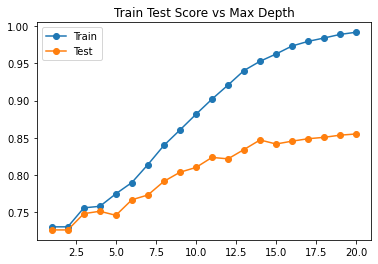

In [172]:
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.title("Train Test Score vs Max Depth")
plt.legend()
plt.show()

### Random Forest

In [173]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [174]:
prediction_test=classifier_rf.predict(X_test)

In [175]:
print("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))

Accuracy =  0.7648953301127214


##Modelling With Feature Selection

###Random Forest

In [176]:
df_dummies.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [177]:
feat_labels = ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']
for feature in zip(feat_labels, classifier_rf.feature_importances_):
    print(feature)

('SeniorCitizen', 0.0)
('Partner', 0.004247655047440182)
('Dependents', 0.012254526150462757)
('tenure', 0.13794860914608803)
('PhoneService', 0.0026161645295419956)
('MultipleLines', 0.006432778763826101)
('InternetService', 0.0)
('OnlineSecurity', 0.018054413407158545)
('OnlineBackup', 0.0049722505076665304)
('DeviceProtection', 0.0024967898725640173)
('TechSupport', 0.018953083847972316)
('StreamingTV', 0.006234534456831072)
('StreamingMovies', 0.014303101199007549)
('PaperlessBilling', 0.03899441235692745)
('MonthlyCharges', 0.09577437392049555)
('TotalCharges', 0.07940650924079165)
('Churn', 0.2557342666254281)
('Contract_Month-to-month', 0.04833908103190443)
('Contract_One year', 0.13436172335790725)
('Contract_Two year', 0.0034106861256996356)
('PaymentMethod_Bank transfer (automatic)', 0.005854205769889111)
('PaymentMethod_Credit card (automatic)', 0.10276326315347012)
('PaymentMethod_Electronic check', 0.006847571488927601)


In [178]:
#RF Classifier
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(classifier_rf, threshold=0.15)
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(max_depth=5, n_jobs=-1,
                                                 oob_score=True,
                                                 random_state=42),
                threshold=0.15)

In [179]:
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [180]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

RandomForestClassifier(n_estimators=10000, n_jobs=-1, random_state=0)

In [181]:
# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature (2 Features) Model
accuracy_score(y_test, y_important_pred)

0.725925925925926

## Hyperparameter Tuning

###Hyperparameter tuning model with all features

####RandomForest

In [182]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [183]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200],
    'max_features': ['auto','sqrt'],
    'bootstrap':[True,False]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 720 candidates, totalling 2880 fits


In [ ]:
grid_search.best_score_

In [ ]:
rf_best = grid_search.best_estimator_
rf_best.fit(X_train, y_train)

####Decision Tree

In [ ]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier(max_depth=1000, random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1000, random_state=42)

In [ ]:
dtree = tree.DecisionTreeClassifier(max_leaf_nodes=4000, random_state=42)
dtree.fit(X_train, y_train)
dtree.score(X_train, y_train)

0.9971006489023885

In [ ]:
y_dtree = dtree.predict(X_test)
print(accuracy_score(y_test, y_dtree))

0.8573268921095009


####Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
#Hyperparameters
penalty = ['l1', 'l2']
C = np.logspace(-4,4,20)
hyperparameters = dict(penalty=penalty, C=C)
logreg = LogisticRegression()
#Grid Search
lr_tune = GridSearchCV(logreg, hyperparameters, cv=10)
#Fitting Model
best_model = lr_tune.fit(X_train,y_train)
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
#Prediksi menggunakan model baru
y_pred = best_model.predict(X_test)
#Check performa dari model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Best Penalty: l2
Best C: 4.281332398719396
              precision    recall  f1-score   support

           0       0.78      0.72      0.75      1545
           1       0.74      0.79      0.77      1560

    accuracy                           0.76      3105
   macro avg       0.76      0.76      0.76      3105
weighted avg       0.76      0.76      0.76      3105



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
200 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Sol

###Hyperparameters with model from feature selection

####Random Forest

In [149]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200],
    'max_features': ['auto','sqrt'],
    'bootstrap':[True,False]
}
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")
grid_search.fit(X_train, y_train)


Fitting 4 folds for each of 720 candidates, totalling 2880 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [2, 3, 5, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [101]:
grid_search.best_score_

0.8446782400981112

In [102]:
rf_best = grid_search.best_estimator_
rf_best.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=5,
                       n_estimators=50, n_jobs=-1, random_state=42)

## Evaluation

In [100]:
y_lr = lr.predict(X_test)
y_dtree = dtree.predict(X_test)
y_rf=classifier_rf.predict(X_test)
y_important_pred = clf_important.predict(X_important_test)

### Accuracy Score

In [101]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_lr))
print(accuracy_score(y_test, y_dtree))
print(accuracy_score(y_test, y_rf))
print(accuracy_score(y_test, y_important_pred))

0.7571658615136876
0.8570048309178744
0.7648953301127214
0.725925925925926


### Precision Score

In [102]:
from sklearn.metrics import precision_score
print(precision_score(y_test, y_lr, average='macro'))
print(precision_score(y_test, y_dtree, average='macro'))
print(precision_score(y_test, y_rf, average='macro'))
print(precision_score(y_test, y_important_pred, average='macro'))

0.7583702000605663
0.8647550096237733
0.7714080459770114
0.7526622741665114


### Recall Score

In [103]:
from sklearn.metrics import recall_score
print(recall_score(y_test, y_lr, average='macro'))
print(recall_score(y_test, y_dtree, average='macro'))
print(recall_score(y_test, y_rf, average='macro'))
print(recall_score(y_test, y_important_pred, average='macro'))

0.7569952701020661
0.8566529748568583
0.76451643017177
0.7251338063231267


### Confusion Matrix

In [104]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_lr))
print(confusion_matrix(y_test, y_dtree))
print(confusion_matrix(y_test, y_rf))
print(confusion_matrix(y_test, y_important_pred))

[[1115  430]
 [ 324 1236]]
[[1211  334]
 [ 110 1450]]
[[1060  485]
 [ 245 1315]]
[[ 867  678]
 [ 173 1387]]


### ROC and AUC

In [105]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_lr, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y_test, y_dtree, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y_test, y_rf, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y_test, y_important_pred,pos_label = 1)
print(auc(fpr, tpr))

0.7569952701020662
0.8566529748568583
0.7645164301717701
0.7251338063231266


In [120]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_lr))
print(classification_report(y_test, y_dtree))
print(classification_report(y_test, y_rf))
print(classification_report(y_test, y_important_pred))


              precision    recall  f1-score   support

           0       0.77      0.72      0.74      1545
           1       0.74      0.79      0.76      1560

    accuracy                           0.75      3105
   macro avg       0.75      0.75      0.75      3105
weighted avg       0.75      0.75      0.75      3105

              precision    recall  f1-score   support

           0       0.94      0.79      0.86      1545
           1       0.82      0.95      0.88      1560

    accuracy                           0.87      3105
   macro avg       0.88      0.87      0.87      3105
weighted avg       0.88      0.87      0.87      3105

              precision    recall  f1-score   support

           0       0.80      0.67      0.73      1545
           1       0.72      0.83      0.77      1560

    accuracy                           0.75      3105
   macro avg       0.76      0.75      0.75      3105
weighted avg       0.76      0.75      0.75      3105

              preci

Conclution
- Gender tidak berpengaruh pada Customer Churn
- Customer yang berlangganan lama cenderung lebih setia 
- Customer yang berlangganan Month to month cenderung lebih gampang untuk churn
- Semakin lama customer berlangganan maka total pembayaran semakin tinggi
- Customer yang Monthly Charges-nya kecil cenderung lebih setia
- Berdasarkan beberapa evaluasi yang dilakukan, model yang paling optimal adalah Decision Tree
- Customer yang bukan Senior Citizen cenderung lebih gampang untuk churn 

Rekomendasi 
- Untuk mengurangi Churn Rate, perusahaan seharusnya berusaha mempengaruhi customer agar mengambil kontrak yang lebih panjang.
- Perusahaan berusaha menggiring customer untuk mengambil Payment Method selain Electronic check